# Lstm 时间序列

In [79]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader

from importlib import reload
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype= torch.float32

In [23]:
%matplotlib widget
print(torch.__version__)
print(torch.cuda.is_available())

1.13.1
True


## 数据读取&预处理

In [ ]:
数据需要分割为，bacth 每个bacth是时间序列例如：100个时间序列，分4个bacth，5-Time sequence，那么第一个
bacth的 index  [[0,1,2,3,4],[25,26,27,28,29],[50,51,52,53,54],[75,76,77,78,79]] shape为[4,5,6] #6 为向量的维度

In [82]:
# 用作测试的随机生成数据，模型搭建阶段
data = torch.randn(100, 20, 6).to(device)
print(data.shape)
data_loader = DataLoader(data,batch_size=10, shuffle =False)

torch.Size([100, 20, 6])


In [84]:
for ite_data in data_loader:
    print(ite_data.shape)

torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])
torch.Size([10, 20, 6])


## 模型搭建Trucated Time LSTM


$$
p(x_1,x_2,\cdots, x_T) = p(x_T | x_{T-1}, x_{T-2}\cdots,x_1 )p(x_{T-1} |x_{T-2}, x_{T-2}\cdots,x_1 )\cdots p(x_1|x_0)
$$

### Code

In [135]:
# 定义LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, stateful=False):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.stateful = stateful
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),  # 输入层到隐藏层的线性变换
            nn.Sigmoid(), 
            nn.Linear(hidden_size, output_size)  # 隐藏层到输出层的线性变换
        )
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out


In [137]:
model = LSTMModel(input_size=6, hidden_size=64, output_size=6, num_layers=2, stateful=True).to(device)
print(model)

LSTMModel(
  (lstm): LSTM(6, 64, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=6, bias=True)
  )
)


In [138]:
# 定义损失函数
criterion = nn.MSELoss()
# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [139]:

# 在训练循环中使用模型
for epoch in range(10):
    for ite_data in data_loader:
        optimizer.zero_grad()
        outputs = model(ite_data)
        loss = criterion(outputs,ite_data)
        loss.backward()
        optimizer.step()
    # 在每个epoch结束时重置隐藏状态
    

#### Trian

#### Test

#### Plot

## Other

In [53]:
import torch
import torch.nn as nn

# 创建一个 LSTM 模型
input_size = 6
hidden_size = 64
num_layers = 2

lstm = nn.LSTM(input_size, hidden_size, num_layers)

# 获取 LSTM 层的内部参数
for name, param in lstm.named_parameters():
    print(name, param.shape)  # 打印参数名称和形状
    if 'weight' in name:
        print(param)  

weight_ih_l0 torch.Size([256, 6])
Parameter containing:
tensor([[ 0.0190,  0.0466,  0.0939, -0.1031, -0.0823, -0.0815],
        [-0.1227,  0.1120, -0.0202,  0.0612, -0.0999,  0.0019],
        [ 0.0784, -0.0855, -0.0059, -0.1212, -0.1186,  0.0731],
        ...,
        [ 0.1211, -0.1246,  0.0883, -0.0198, -0.0063, -0.1188],
        [ 0.0736, -0.0348, -0.0507, -0.0438, -0.0813, -0.0166],
        [ 0.0602,  0.0599,  0.0517, -0.0870, -0.1011,  0.0219]],
       requires_grad=True)
weight_hh_l0 torch.Size([256, 64])
Parameter containing:
tensor([[ 0.0712,  0.0581, -0.0472,  ..., -0.0971,  0.0308, -0.0876],
        [-0.0146, -0.0151, -0.0565,  ..., -0.0939, -0.0738, -0.1106],
        [ 0.0443,  0.0448, -0.0205,  ...,  0.0342,  0.0542,  0.0120],
        ...,
        [-0.0541, -0.1113,  0.0172,  ..., -0.0155, -0.0938, -0.0826],
        [ 0.0789,  0.0968,  0.0339,  ..., -0.0500, -0.1214,  0.0398],
        [-0.0329,  0.0444,  0.0413,  ..., -0.1051, -0.0540,  0.0395]],
       requires_grad=True)
b

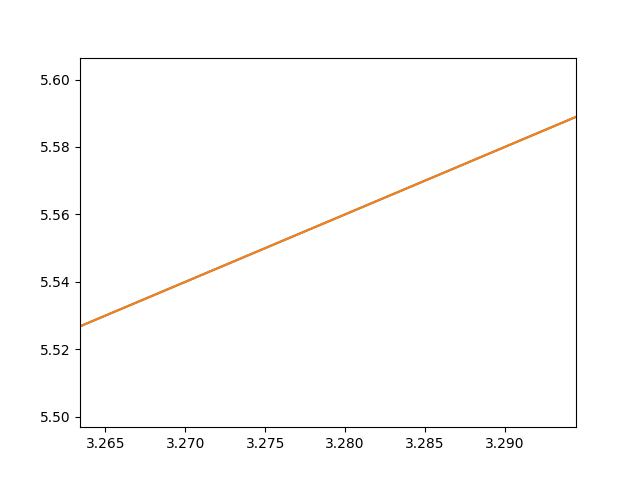

In [54]:

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.plot(x, y)
plt.show()

In [ ]:
 哎查处